In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [4]:
pd.set_option('display.max_rows', None) #if activated avoid runing a cell to show a whole df, use head()

In [5]:
url = "clust_data_nextbike_2020-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [6]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
0,50.921618,6.933237,50.913049,6.922490,2020-07-01 09:31:02.322428,2020-07-01 09:49:01.995455,18.0,1215.0,31804315,31819860,571.0,NaN,BIKE 22933
1,50.913049,6.922490,50.910794,6.941967,2020-07-01 10:35:02.336121,2020-07-01 10:44:02.333799,9.0,1389.0,31819860,31821838,46.0,NaN,BIKE 22933
2,50.910794,6.941967,50.931395,6.918226,2020-07-01 11:32:02.897704,2020-07-01 11:55:01.902627,23.0,2832.0,31821838,31824497,48.0,NaN,BIKE 22933
3,50.931395,6.918226,50.929816,6.913806,2020-07-01 12:03:01.601807,2020-07-01 12:24:02.273590,21.0,356.0,31824497,31825694,8.0,NaN,BIKE 22933
4,50.929816,6.913806,50.929823,6.913615,2020-07-01 17:59:02.213975,2020-07-01 18:05:02.088433,6.0,13.0,31825694,31843292,335.0,NaN,BIKE 22933


In [7]:
negative_values = df[df['ride_time_minutes'] < 0].index.to_list() #check for negative values
negative_values

[]

In [8]:
#df.drop(negative_values, inplace=True) #activate if needed

### -Grouping distances by ride time
#### -Saving the result of groupng into Series 

In [9]:
sr= df.groupby('ride_time_minutes')['distance'].apply(list) 

In [10]:
sr

ride_time_minutes
1.0        [104.0, 53.0, 23.0, 26.0, 23.0, 39.0, 21.0, 52...
2.0        [16.0, 4.0, 193.0, 24.0, 9.0, 2917.0, 30.0, 5....
3.0        [238.0, 28.0, 18.0, 9.0, 1173.0, 18.0, 54.0, 5...
4.0        [376.0, 224.0, 24.0, 246.0, 76.0, 61.0, 240.0,...
5.0        [610.0, 599.0, 341.0, 135.0, 246.0, 477.0, 541...
6.0        [13.0, 922.0, 31.0, 479.0, 361.0, 638.0, 587.0...
7.0        [1238.0, 762.0, 924.0, 945.0, 473.0, 715.0, 17...
8.0        [437.0, 261.0, 256.0, 962.0, 908.0, 859.0, 102...
9.0        [1389.0, 1188.0, 597.0, 1097.0, 1677.0, 596.0,...
10.0       [597.0, 1118.0, 1095.0, 1110.0, 1211.0, 1218.0...
11.0       [1870.0, 782.0, 1040.0, 1861.0, 794.0, 1839.0,...
12.0       [758.0, 1369.0, 1669.0, 1607.0, 573.0, 2384.0,...
13.0       [783.0, 789.0, 2006.0, 1729.0, 1701.0, 1741.0,...
14.0       [3069.0, 1368.0, 2376.0, 2515.0, 525.0, 1965.0...
15.0       [2261.0, 1221.0, 797.0, 2116.0, 811.0, 2291.0,...
16.0       [2751.0, 3629.0, 167.0, 590.0, 1266.0, 1406.0,...
17.0  

In [30]:
sr[5.0]

[610.0,
 599.0,
 341.0,
 135.0,
 246.0,
 477.0,
 541.0,
 180.0,
 376.0,
 16.0,
 872.0,
 405.0,
 16.0,
 347.0,
 16.0,
 327.0,
 108.0,
 443.0,
 358.0,
 429.0,
 324.0,
 4.0,
 344.0,
 715.0,
 20.0,
 490.0,
 206.0,
 398.0,
 425.0,
 303.0,
 474.0,
 212.0,
 457.0,
 10.0,
 216.0,
 780.0,
 362.0,
 540.0,
 4.0,
 26.0,
 788.0,
 395.0,
 491.0,
 540.0,
 561.0,
 280.0,
 385.0,
 472.0,
 231.0,
 495.0,
 349.0,
 492.0,
 15.0,
 366.0,
 430.0,
 600.0,
 30.0,
 866.0,
 694.0,
 498.0,
 418.0,
 13.0,
 523.0,
 478.0,
 422.0,
 80.0,
 260.0,
 22.0,
 561.0,
 335.0,
 323.0,
 411.0,
 425.0,
 383.0,
 455.0,
 491.0,
 671.0,
 284.0,
 345.0,
 474.0,
 282.0,
 671.0,
 362.0,
 417.0,
 451.0,
 6.0,
 1191.0,
 713.0,
 202.0,
 546.0,
 531.0,
 290.0,
 455.0,
 483.0,
 27.0,
 694.0,
 345.0,
 27.0,
 549.0,
 103.0,
 24.0,
 652.0,
 334.0,
 366.0,
 57.0,
 376.0,
 23.0,
 670.0,
 21.0,
 694.0,
 48.0,
 5.0,
 174.0,
 598.0,
 11.0,
 736.0,
 527.0,
 476.0,
 888.0,
 479.0,
 278.0,
 318.0,
 291.0,
 383.0,
 244.0,
 397.0,
 173.0,
 393.0,
 6

In [11]:
count_of_distances = (sr.apply(len)).to_list()

#### -Saving the result of groupng into DataFrame

In [12]:
distances_df = sr.to_frame() #if data is needed in a DataFrame instead of Series for visualization

In [13]:
distances_df.insert(1, 'count', count_of_distances) #adding count of the values in distance

In [15]:
statistics.mean(count_of_distances)

38.47406989853439

In [16]:
statistics.median(count_of_distances)

1.0

### -Grouping ride durations by distance
#### -Saving the result of groupng into Series 

In [17]:
sr2= df.groupby('distance')['ride_time_minutes'].apply(list) 
sr2

distance
0.0                                            [995.0, 28.0]
1.0        [34.0, 35.0, 24.0, 29.0, 12.0, 1750.0, 598.0, ...
2.0        [6.0, 6.0, 799.0, 29.0, 14.0, 16.0, 19.0, 4.0,...
3.0        [12.0, 6.0, 3.0, 15.0, 6.0, 4.0, 46.0, 10.0, 1...
4.0        [2.0, 4.0, 6.0, 5.0, 23.0, 5.0, 15.0, 13.0, 10...
5.0        [161.0, 660.0, 3.0, 62.0, 2.0, 27.0, 3.0, 1095...
6.0        [48.0, 6.0, 6.0, 33.0, 5.0, 4.0, 6.0, 84.0, 62...
7.0        [163.0, 6.0, 1.0, 32.0, 298.0, 335.0, 36.0, 4....
8.0        [7.0, 1.0, 4.0, 6.0, 49.0, 28.0, 1.0, 1.0, 6.0...
9.0        [65.0, 44.0, 3.0, 333.0, 8.0, 7.0, 4.0, 6.0, 2...
10.0       [15.0, 120.0, 256.0, 29.0, 8.0, 52.0, 5.0, 11....
11.0       [1.0, 28.0, 21.0, 18.0, 40.0, 4.0, 1.0, 8.0, 4...
12.0       [1.0, 1.0, 1.0, 18.0, 18.0, 6.0, 1.0, 1.0, 1.0...
13.0       [6.0, 1.0, 1.0, 1.0, 1.0, 140.0, 1.0, 4.0, 9.0...
14.0       [13.0, 1.0, 1.0, 1.0, 1.0, 12.0, 1.0, 3.0, 1.0...
15.0       [28.0, 13.0, 1.0, 1.0, 1.0, 1.0, 12.0, 8.0, 1....
16.0       [2.0

In [18]:
count_of_rides = (sr2.apply(len)).to_list()

#### -Saving the result of groupng into DataFrame

In [19]:
rides_df = sr2.to_frame()

In [20]:
rides_df.insert(1, 'count', count_of_rides) #adding count of the values in ride_time_minutes

In [21]:
rides_df

,ride_time_minutes,count
distance,,
0.0,"[995.0, 28.0]",2
1.0,"[34.0, 35.0, 24.0, 29.0, 12.0, 1750.0, 598.0, ...",15
2.0,"[6.0, 6.0, 799.0, 29.0, 14.0, 16.0, 19.0, 4.0,...",21
3.0,"[12.0, 6.0, 3.0, 15.0, 6.0, 4.0, 46.0, 10.0, 1...",30
4.0,"[2.0, 4.0, 6.0, 5.0, 23.0, 5.0, 15.0, 13.0, 10...",41
5.0,"[161.0, 660.0, 3.0, 62.0, 2.0, 27.0, 3.0, 1095...",50
6.0,"[48.0, 6.0, 6.0, 33.0, 5.0, 4.0, 6.0, 84.0, 62...",44
7.0,"[163.0, 6.0, 1.0, 32.0, 298.0, 335.0, 36.0, 4....",55
8.0,"[7.0, 1.0, 4.0, 6.0, 49.0, 28.0, 1.0, 1.0, 6.0...",50


In [22]:
df[df['distance'] == 0.0]

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
8497,50.902895,6.934950,50.902898,6.934946,2020-07-19 20:23:02.995256,2020-07-20 12:58:02.436705,995.0,0.0,32788117,32826843,166.0,NaN,BIKE 21473
55566,50.968522,6.946804,50.968521,6.946801,2020-07-23 10:57:03.252744,2020-07-23 11:25:03.138368,28.0,0.0,32972075,32996210,832.0,NaN,BIKE 22278


In [23]:
df[df["name"] == "BIKE 21473"]

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
8457,50.945253,6.883062,50.948238,6.887990,2020-07-02 22:55:02.076149,2020-07-02 23:00:03.303280,5.0,479.0,31768864,31912544,2815.0,NaN,BIKE 21473
8458,50.948238,6.887990,50.958057,6.907402,2020-07-03 15:45:02.049114,2020-07-03 16:02:01.935943,17.0,1744.0,31912544,31941663,1005.0,NaN,BIKE 21473
8459,50.958057,6.907402,50.967247,6.913734,2020-07-03 16:16:01.534600,2020-07-03 16:26:01.740020,10.0,1114.0,31941663,31943164,14.0,NaN,BIKE 21473
8460,50.967247,6.913734,50.933078,6.941789,2020-07-04 11:19:02.194771,2020-07-04 13:47:02.212641,148.0,4279.0,31943164,31986001,1133.0,NaN,BIKE 21473
8461,50.933078,6.941789,50.944947,6.896207,2020-07-04 17:56:01.603763,2020-07-04 18:23:02.839404,27.0,3457.0,31986001,32006610,249.0,NaN,BIKE 21473
8462,50.944947,6.896207,50.930606,6.940545,2020-07-04 19:09:02.721783,2020-07-04 19:27:01.746310,18.0,3493.0,32006610,32011656,46.0,NaN,BIKE 21473
8463,50.930606,6.940545,50.947647,6.919995,2020-07-04 20:10:01.818247,2020-07-04 20:30:01.883954,20.0,2381.0,32011656,32015820,43.0,NaN,BIKE 21473
8464,50.947647,6.919995,50.926726,6.938814,2020-07-04 20:47:01.800330,2020-07-04 21:47:01.907999,60.0,2675.0,32015820,32020276,17.0,NaN,BIKE 21473
8465,50.926726,6.938814,50.915376,6.921935,2020-07-04 23:18:02.023720,2020-07-04 23:33:02.432984,15.0,1730.0,32020276,32024930,91.0,NaN,BIKE 21473
8466,50.915376,6.921935,50.970258,6.912329,2020-07-05 03:38:01.973733,2020-07-05 04:03:02.115045,25.0,6142.0,32024930,32032329,245.0,NaN,BIKE 21473


In [24]:
plot_df = df[df["ride_time_minutes"] < 7500]
plot_df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,distance,uid_begin,uid_end,standing_before_ride,address,name
0,50.921618,6.933237,50.913049,6.922490,2020-07-01 09:31:02.322428,2020-07-01 09:49:01.995455,18.0,1215.0,31804315,31819860,571.0,NaN,BIKE 22933
1,50.913049,6.922490,50.910794,6.941967,2020-07-01 10:35:02.336121,2020-07-01 10:44:02.333799,9.0,1389.0,31819860,31821838,46.0,NaN,BIKE 22933
2,50.910794,6.941967,50.931395,6.918226,2020-07-01 11:32:02.897704,2020-07-01 11:55:01.902627,23.0,2832.0,31821838,31824497,48.0,NaN,BIKE 22933
3,50.931395,6.918226,50.929816,6.913806,2020-07-01 12:03:01.601807,2020-07-01 12:24:02.273590,21.0,356.0,31824497,31825694,8.0,NaN,BIKE 22933
4,50.929816,6.913806,50.929823,6.913615,2020-07-01 17:59:02.213975,2020-07-01 18:05:02.088433,6.0,13.0,31825694,31843292,335.0,NaN,BIKE 22933


In [25]:
min_index_list = plot_df[plot_df["ride_time_minutes"] == 1.0].index.to_list() 

In [26]:
plot_df.drop(min_index_list, inplace=True)

Text(0, 0.5, 'Count of rides')

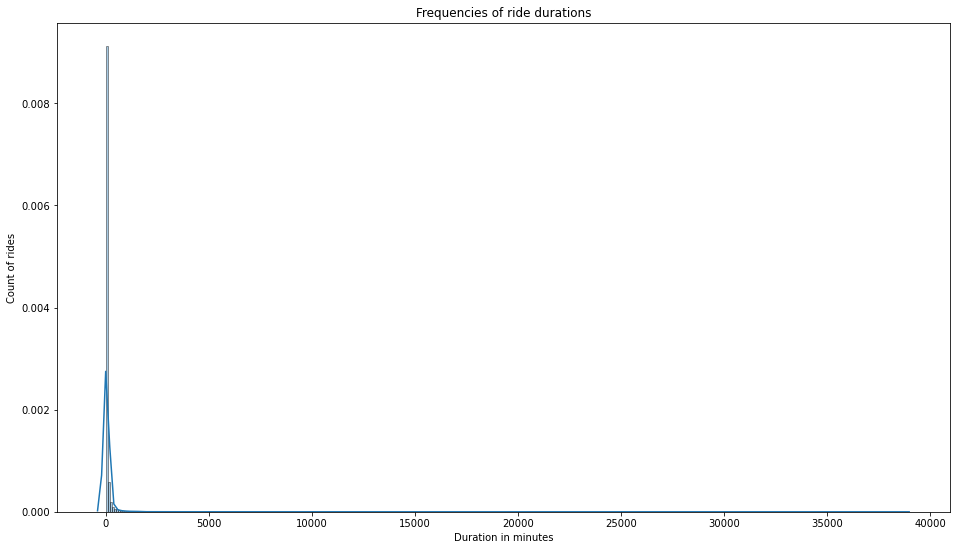

In [27]:
org_plt = sns.distplot(df["ride_time_minutes"], bins=400, norm_hist=False,kde=True, hist_kws=dict(edgecolor="k", linewidth=1))
org_plt.set_title('Frequencies of ride durations')
org_plt.set_xlabel('Duration in minutes')
org_plt.set_ylabel('Count of rides')

Text(0, 0.5, 'Count of rides')

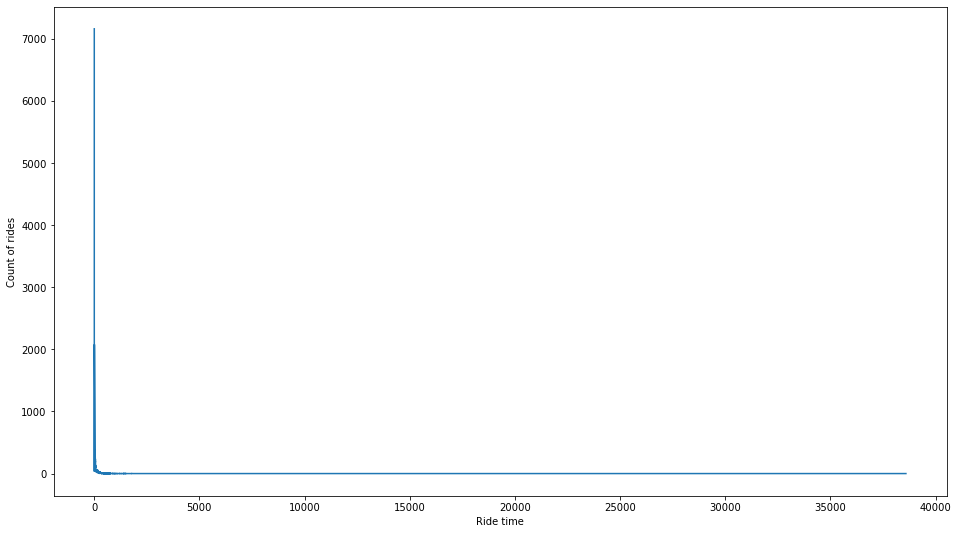

In [28]:
plt.plot(distances_df.index, distances_df["count"])
plt.xlabel('Ride time')
plt.ylabel('Count of rides')

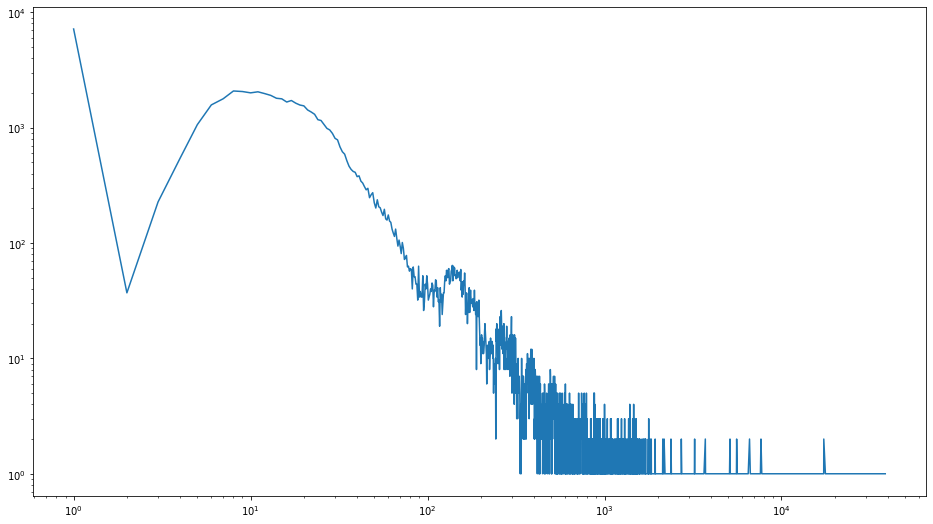

In [55]:
plt.loglog(distances_df.index, distances_df["count"])

## Frequencies of distances for multiple lengths

#### Line histogram

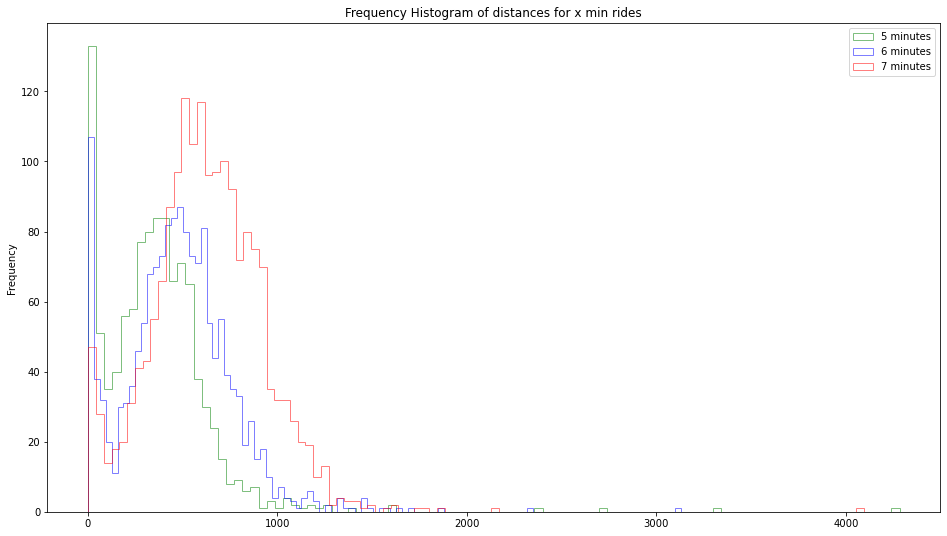

In [56]:
x1 = sr[5.0]
x2 = sr[6.0]
x3 = sr[7.0]

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='5 minutes', histtype='step')
plt.hist(x2, **kwargs, color='b', label='6 minutes', histtype='step')
plt.hist(x3, **kwargs, color='r', label='7 minutes', histtype='step')
plt.gca().set(title='Frequency Histogram of distances for x min rides', ylabel='Frequency')
plt.legend();

#### Bar histogram

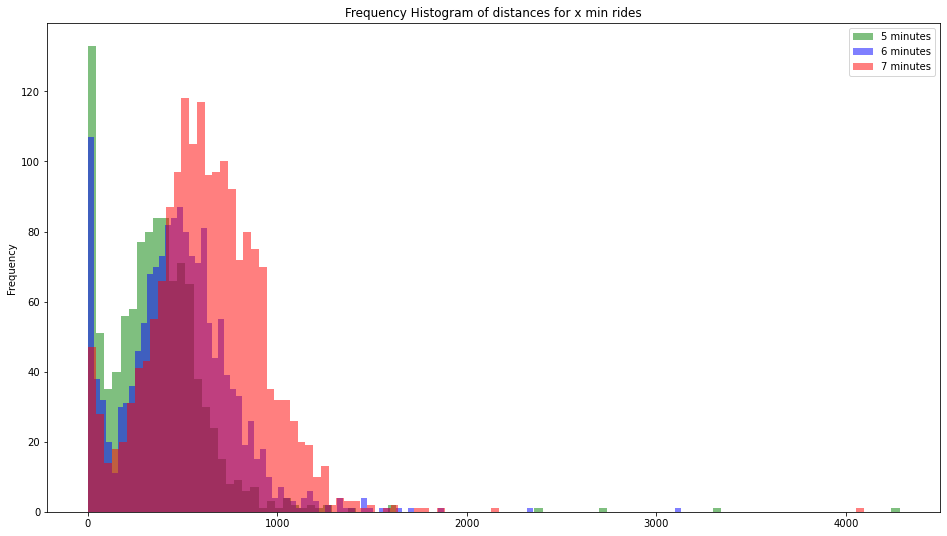

In [57]:
x1 = sr[5.0]
x2 = sr[6.0]
x3 = sr[7.0]

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='5 minutes', histtype='bar')
plt.hist(x2, **kwargs, color='b', label='6 minutes', histtype='bar')
plt.hist(x3, **kwargs, color='r', label='7 minutes', histtype='bar')
plt.gca().set(title='Frequency Histogram of distances for x min rides', ylabel='Frequency')
plt.legend();

### Using a function to limit distances to 2500 meters to see frequencies without extreme values

In [58]:
x1 = short_list(5.0)
x2 = short_list(6.0)
x3 = short_list(7.0)

kwargs = dict(alpha=0.5, bins=80)

plt.hist(x1, **kwargs, color='g', label='5 minutes', histtype='step')
plt.hist(x2, **kwargs, color='b', label='6 minutes', histtype='step')
plt.hist(x3, **kwargs, color='r', label='7 minutes', histtype='step')
plt.gca().set(title='Frequency Histogram of distances for x min rides', ylabel='Frequency')
plt.legend();

NameError: name 'short_list' is not defined

## Looking into distribution of distances for multiple ride lengths using boxplots

In [ ]:
distances_df

In [ ]:
min(distances_df['distance'][19.0])

In [ ]:
g1 = distances_df['distance'][16.0]
g2 = distances_df['distance'][17.0]
g3 = distances_df['distance'][18.0]
g4 = distances_df['distance'][19.0]
g5 = distances_df['distance'][20.0]
data_to_plot = [g1, g2, g3, g4, g5]

In [ ]:
plt.boxplot(data_to_plot, labels= ('16','17','18','19','20'))
plt.title('Distances data for multiple ride lengths')
plt.ylabel('Distances')
plt.xlabel('Ride length in minutes')
plt.show() 

In [ ]:
plt.boxplot(distances_df['distance'][15.0], labels=['15'])
plt.title('Distances data for 15 min rides')
plt.ylabel('Distances')
plt.xlabel('Ride length in minutes')
plt.show() 